In [1]:
#@title Libs
import numpy as np
from math import log
from random import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#@title V1 funcional
def cola(tiemposUsuarioEnCajero: list, tiemposLLegadaUsuario: list) -> list:
  
  tiempos = []
  TiempoServicio = 1440 # 24 horas

  '''
  'tiempo Asignado Llegada Usuario',
  'tiempo Asignado Usuario EnCajero',
  'tiempo Llegada Usuario',
  'tiempo Usuario sale Cajero',
  'tiempo Usario Espera Cajero',
  'tiempo Cajero Espera Usuario',
  'tiempo total del usuario'
  '''

  linea = [tiemposLLegadaUsuario[0], 
           tiemposUsuarioEnCajero[0],  
           tiemposLLegadaUsuario[0], 
           tiemposLLegadaUsuario[0] + tiemposUsuarioEnCajero[0], 
           0.00, 
           0.00,
           tiemposUsuarioEnCajero[0]]

  tiempos.append(linea)

  for i in range(1, len(tiemposUsuarioEnCajero)):
    
    usuarioAnterior = tiempos[i-1]

    tiempoAsignadoLlegadaUsuario = tiemposLLegadaUsuario[i]
    tiempoAsignadoUsuarioEnCajero = tiemposUsuarioEnCajero[i]

    tiempoCalculadoLLegadaUsuario = usuarioAnterior[2] + tiempoAsignadoLlegadaUsuario
    tiempoCalculadoSalidaCajero = usuarioAnterior[3] + tiempoAsignadoUsuarioEnCajero

    if tiempoCalculadoLLegadaUsuario > usuarioAnterior[3]:  

      tiempoCalculadoEsperaUsuario = 0
      tiempoCalculadoEsperaCajero = tiempoCalculadoLLegadaUsuario - usuarioAnterior[3]
      tiempoCalculadoSalidaCajero += tiempoCalculadoEsperaCajero
      tiempoTotalUsuario = tiempoAsignadoUsuarioEnCajero
      
    else:

      tiempoCalculadoEsperaCajero = 0
      tiempoCalculadoEsperaUsuario = usuarioAnterior[3] - tiempoCalculadoLLegadaUsuario
      tiempoTotalUsuario = tiempoCalculadoEsperaUsuario + tiempoAsignadoUsuarioEnCajero

    linea = [tiempoAsignadoLlegadaUsuario,
             tiempoAsignadoUsuarioEnCajero,
             tiempoCalculadoLLegadaUsuario,
             tiempoCalculadoSalidaCajero,
             tiempoCalculadoEsperaUsuario,
             tiempoCalculadoEsperaCajero,
             tiempoTotalUsuario]

    tiempos.append(linea)

  return tiempos

In [3]:
#@title V2 funcional
def cola(lmbda:list, TiempoServicio:int) -> list:
  
  tiempos = []

  expRandomLlegada = round(-(1/lmbda[0])*log(random()),0)
  expRandomCajero = round(-(1/lmbda[1])*log(random()), 0)

  '''
  'tiempo Asignado Llegada Usuario',
  'tiempo Asignado Usuario EnCajero',
  'tiempo Llegada Usuario',
  'tiempo Usuario sale Cajero',
  'tiempo Usario Espera Cajero',
  'tiempo Cajero Espera Usuario',
  'tiempo total del usuario'
  '''

  linea = [expRandomLlegada, 
           expRandomCajero,  
           expRandomLlegada, 
           expRandomLlegada + expRandomCajero, 
           0.00, 
           0.00,
           expRandomCajero]

  usuarioSaleCajero = linea[3]
  tiempos.append(linea)

  while usuarioSaleCajero < TiempoServicio:
    
    usuarioAnterior = tiempos[len(tiempos)-1]
    llegadaUsuarioAnterior = usuarioAnterior[2]
    salidaUsuarioAnterior = usuarioAnterior[3]

    allegadaUsuario = round(-(1/lmbda[0])*log(random()), 0)
    usuarioEnCajero = round(-(1/lmbda[1])*log(random()), 0)

    llegadaUsuario = llegadaUsuarioAnterior + allegadaUsuario
    usuarioSaleCajero = salidaUsuarioAnterior + usuarioEnCajero

    if usuarioSaleCajero > TiempoServicio:
        print(f"Usuario #{len(tiempos)+1} no pudo ser atendido")
    
    if llegadaUsuario > salidaUsuarioAnterior:  
      
      usuarioEsperaCajero = 0
      cajeroEsperaUsuario = llegadaUsuario - salidaUsuarioAnterior
      usuarioSaleCajero += cajeroEsperaUsuario
      TotalUsuario = usuarioEnCajero
      
    else:

      cajeroEsperaUsuario = 0
      usuarioEsperaCajero = salidaUsuarioAnterior - llegadaUsuario
      TotalUsuario = usuarioEsperaCajero + usuarioEnCajero

    linea = [allegadaUsuario,
             usuarioEnCajero,
             llegadaUsuario,
             usuarioSaleCajero,
             usuarioEsperaCajero,
             cajeroEsperaUsuario,
             TotalUsuario]

    tiempos.append(linea)

  return tiempos

In [4]:
#@title Dataframe

lmbda =   0.14#@param {type:"number"}
tiempoServicio =  120#@param {type:"integer"}

tiemposCalculados = cola([0.14,0.15], tiempoServicio)

columns = [
  'tiempo Asignado Llegada Usuario',
  'tiempo Asignado Usuario EnCajero',
  'tiempo Llegada Usuario',
  'tiempo Usuario sale Cajero',
  'tiempo Usuario Espera Cajero',
  'tiempo Cajero Espera Usuario',
  'tiempo total del usuario'
]

dataFrame = pd.DataFrame(data=tiemposCalculados, columns = columns)
dataFrame

Usuario #14 no pudo ser atendido


,tiempo Asignado Llegada Usuario,tiempo Asignado Usuario EnCajero,tiempo Llegada Usuario,tiempo Usuario sale Cajero,tiempo Usuario Espera Cajero,tiempo Cajero Espera Usuario,tiempo total del usuario
0,6.0,9.0,6.0,15.0,0.0,0.0,9.0
1,17.0,7.0,23.0,30.0,0.0,8.0,7.0
2,9.0,5.0,32.0,37.0,0.0,2.0,5.0
3,6.0,8.0,38.0,46.0,0.0,1.0,8.0
4,3.0,1.0,41.0,47.0,5.0,0.0,6.0
5,18.0,1.0,59.0,60.0,0.0,12.0,1.0
6,8.0,17.0,67.0,84.0,0.0,7.0,17.0
7,8.0,10.0,75.0,94.0,9.0,0.0,19.0
8,0.0,1.0,75.0,95.0,19.0,0.0,20.0
9,9.0,10.0,84.0,105.0,11.0,0.0,21.0


In [5]:
#@title ESTADISTICAS UN SERVIDOR
print(f"Media del tiempo que espera un usuario el cajero: { round(np.mean(dataFrame['tiempo Usuario Espera Cajero'])/60,2)} horas en {tiempoServicio/60} horas.")
print(f"Media del tiempo que espera un cajero a un usuario: { np.mean(dataFrame['tiempo Cajero Espera Usuario'])} minutos en {tiempoServicio/60} horas.")
print(f"Media del tiempo gastado por usuario: { round(np.mean(dataFrame['tiempo total del usuario']),2)} minutos en {tiempoServicio/60} horas.")
print(f"Personas atendidas en {tiempoServicio/60} horas: {len(dataFrame)}")

Media del tiempo que espera un usuario el cajero: 0.11 horas en 2.0 horas.
Media del tiempo que espera un cajero a un usuario: 2.142857142857143 minutos en 2.0 horas.
Media del tiempo gastado por usuario: 13.21 minutos en 2.0 horas.
Personas atendidas en 2.0 horas: 14


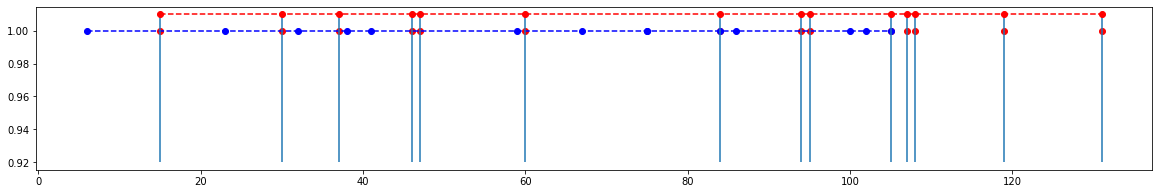

In [6]:
#@title Grafico

fig, ax = plt.subplots(figsize=(20,3))

x = dataFrame["tiempo Llegada Usuario"]
y = np.ones(len(x))
ax.plot(x, y,linestyle='--', marker='o', color='b')


x = dataFrame["tiempo Usuario sale Cajero"]
y = np.ones(len(x))*1.01

for i in range(len(x)):
    ax.vlines(x[i], 0.92, y[i])
    
ax.plot(x, y,linestyle='--', marker='o', color='r')


x = dataFrame["tiempo Usuario sale Cajero"]
y = np.ones(len(x))

ax.scatter(x, y,marker='o', color='r')
plt.show()

In [11]:
#@title V1 2 servidores funcional
def servidores_2(lmbda: list, TiempoServicio: int) -> list:

  expRandomLlegada = round(-(1/lmbda[0])*log(random()), 0)
  expRandomCajero = round(-(1/lmbda[1])*log(random()), 0)

  columns = [
      'tiempo Asignado Llegada Usuario',
      'tiempo Asignado Usuario EnCajero',
      'tiempo Llegada Usuario',
      'tiempo Usuario sale Cajero',
      'tiempo Usuario Espera Cajero',
      'tiempo Cajero Espera Usuario',
      'tiempo total del usuario',
      'Cajero'
  ]

  dataFrame = pd.DataFrame(columns=columns)
  
  linea = [expRandomLlegada,
           expRandomCajero, 
           expRandomLlegada,
          expRandomLlegada + expRandomCajero,
          0.00,
          0.00,
          expRandomCajero,
          1]

  dataFrame.loc[0] = linea
  usuarioSaleCajero = linea[3]

  k = 1
  # print(dataFrame.iloc[-1])
  # print(dataFrame.iloc[-1][0])
  
  while usuarioSaleCajero < TiempoServicio:

    UltimoUsuario = dataFrame.iloc[-1]
    llegadaUltimoUsuario = dataFrame.iloc[-1][2]
    salidaUltimoUsuario = dataFrame.iloc[-1][3]
    
    allegadaUsuario = round(-(1/lmbda[0])*log(random()), 0)
    usuarioEnCajero = round(-(1/lmbda[1])*log(random()), 0)
    
    llegadaUsuario = llegadaUltimoUsuario + allegadaUsuario
    
    if k == 1:
      if llegadaUsuario > salidaUltimoUsuario:
        cajero = 1
      else:
        cajero = 2

      usuarioSaleCajero = llegadaUsuario + usuarioEnCajero
      usuarioEsperaCajero = 0
      cajeroEsperaUsuario = llegadaUsuario
      TotalUsuario = usuarioEnCajero
    
    ultimoUsuarioCajero1 = np.array(dataFrame[dataFrame['Cajero'] == 1])[-1]
    ultimoUsuarioCajero2 = np.array(dataFrame[dataFrame['Cajero'] == 2])
    
    if len(ultimoUsuarioCajero2) > 0:
      ultimoUsuarioCajero2 = ultimoUsuarioCajero2[-1]

      if ultimoUsuarioCajero1[3] < ultimoUsuarioCajero2[3]:

        usuarioSaleCajero = ultimoUsuarioCajero1[3] + usuarioEnCajero

        if llegadaUsuario > ultimoUsuarioCajero1[3]:

          usuarioEsperaCajero = 0
          cajeroEsperaUsuario = llegadaUsuario - ultimoUsuarioCajero1[3]
          usuarioSaleCajero += cajeroEsperaUsuario
          TotalUsuario = usuarioEnCajero

        else:

          cajeroEsperaUsuario = 0
          usuarioEsperaCajero = ultimoUsuarioCajero1[3] - llegadaUsuario
          TotalUsuario = usuarioEsperaCajero + usuarioEnCajero
          
        cajero = 1
      
      else:
        usuarioSaleCajero = ultimoUsuarioCajero2[3] + usuarioEnCajero

        if llegadaUsuario > ultimoUsuarioCajero2[3]:

          usuarioEsperaCajero = 0
          cajeroEsperaUsuario = llegadaUsuario - ultimoUsuarioCajero2[3]
          usuarioSaleCajero += cajeroEsperaUsuario
          TotalUsuario = usuarioEnCajero

        else:

          cajeroEsperaUsuario = 0
          usuarioEsperaCajero = ultimoUsuarioCajero2[3] - llegadaUsuario
          TotalUsuario = usuarioEsperaCajero + usuarioEnCajero
          
        cajero = 2
        
    linea = [allegadaUsuario,
             usuarioEnCajero, 
             llegadaUsuario,
            usuarioSaleCajero,
            usuarioEsperaCajero,
            cajeroEsperaUsuario,
            TotalUsuario,
            cajero]

    dataFrame.loc[k] = linea
    k+=1
  return dataFrame

dt = servidores_2([0.3,0.2],60)
dt

,tiempo Asignado Llegada Usuario,tiempo Asignado Usuario EnCajero,tiempo Llegada Usuario,tiempo Usuario sale Cajero,tiempo Usuario Espera Cajero,tiempo Cajero Espera Usuario,tiempo total del usuario,Cajero
0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,1.0
1,2.0,9.0,2.0,11.0,0.0,2.0,9.0,2.0
2,1.0,2.0,3.0,7.0,2.0,0.0,4.0,1.0
3,1.0,4.0,4.0,11.0,3.0,0.0,7.0,1.0
4,0.0,9.0,4.0,20.0,7.0,0.0,16.0,2.0
5,6.0,0.0,10.0,11.0,1.0,0.0,1.0,1.0
6,7.0,9.0,17.0,26.0,0.0,6.0,9.0,1.0
7,9.0,9.0,26.0,35.0,0.0,6.0,9.0,2.0
8,4.0,2.0,30.0,32.0,0.0,4.0,2.0,1.0
9,2.0,1.0,32.0,33.0,0.0,0.0,1.0,1.0


In [8]:
#@title REFACTOR -> V1 2 servidores funcional
def servidores_2(lmbda: list, TiempoServicio: int) -> list:

  expRandomLlegada = round(-(1/lmbda[0])*log(random()), 0)
  expRandomCajero = round(-(1/lmbda[1])*log(random()), 0)

  columns = [
      'tiempo Asignado Llegada Usuario',
      'tiempo Asignado Usuario EnCajero',
      'tiempo Llegada Usuario',
      'tiempo Usuario sale Cajero',
      'tiempo Usuario Espera Cajero',
      'tiempo Cajero Espera Usuario',
      'tiempo total del usuario',
      'Cajero'
  ]

  dataFrame = pd.DataFrame(columns=columns)

  linea = [expRandomLlegada,
           expRandomCajero,
           expRandomLlegada,
           expRandomLlegada + expRandomCajero,
           0.00,
           expRandomLlegada,
           expRandomCajero,
           1]

  dataFrame.loc[0] = linea
  usuarioSaleCajero = linea[3]

  k = 1

  while usuarioSaleCajero < TiempoServicio:

      UltimoUsuario = dataFrame.iloc[-1]
      llegadaUltimoUsuario = dataFrame.iloc[-1][2]

      # CALCULO DE LA SIGUIENTE LLEGADA Y SERVICIO DE UN USUARIO
      allegadaUsuario = round(-(1/lmbda[0])*log(random()), 0)
      usuarioEnCajero = round(-(1/lmbda[1])*log(random()), 0)

      # CALCULO LLEGADA DE USUARIO EN EL TIEMPO
      llegadaUsuario = llegadaUltimoUsuario + allegadaUsuario

      if k == 1:
        # Cajero 2 para que inicialmente no falle el programa
        cajero = 2
        usuarioSaleCajero = llegadaUsuario + usuarioEnCajero
        usuarioEsperaCajero = 0
        cajeroEsperaUsuario = llegadaUsuario
        TotalUsuario = usuarioEnCajero

      ultimoUsuarioCajero1 = np.array(dataFrame[dataFrame['Cajero'] == 1])[-1]
      ultimoUsuarioCajero2 = np.array(dataFrame[dataFrame['Cajero'] == 2])

      if len(ultimoUsuarioCajero2) > 0:
        
        ultimoUsuarioCajero2 = ultimoUsuarioCajero2[-1]

        if ultimoUsuarioCajero1[3] < ultimoUsuarioCajero2[3]:
          seleccionCajero = ultimoUsuarioCajero1[3] # Ultima salida en el Cajero 1
          cajero = 1
        else:
          seleccionCajero = ultimoUsuarioCajero2[3] # Ultima salida en el Cajero 2
          cajero = 2
        
        usuarioSaleCajero = seleccionCajero + usuarioEnCajero
          
        if llegadaUsuario > seleccionCajero:
            usuarioEsperaCajero = 0
            cajeroEsperaUsuario = llegadaUsuario - seleccionCajero
            usuarioSaleCajero += cajeroEsperaUsuario
            TotalUsuario = usuarioEnCajero
        else:
            cajeroEsperaUsuario = 0
            usuarioEsperaCajero = seleccionCajero - llegadaUsuario
            TotalUsuario = usuarioEsperaCajero + usuarioEnCajero

      linea = [allegadaUsuario,
              usuarioEnCajero,
              llegadaUsuario,
              usuarioSaleCajero,
              usuarioEsperaCajero,
              cajeroEsperaUsuario,
              TotalUsuario,
              cajero]

      dataFrame.loc[k] = linea
      k += 1
  return dataFrame
    
dt = servidores_2([0.2, 0.1], 60)
dt


,tiempo Asignado Llegada Usuario,tiempo Asignado Usuario EnCajero,tiempo Llegada Usuario,tiempo Usuario sale Cajero,tiempo Usuario Espera Cajero,tiempo Cajero Espera Usuario,tiempo total del usuario,Cajero
0,17.0,3.0,17.0,20.0,0.0,17.0,3.0,1.0
1,4.0,21.0,21.0,42.0,0.0,21.0,21.0,2.0
2,2.0,5.0,23.0,28.0,0.0,3.0,5.0,1.0
3,4.0,1.0,27.0,29.0,1.0,0.0,2.0,1.0
4,2.0,5.0,29.0,34.0,0.0,0.0,5.0,1.0
5,4.0,2.0,33.0,36.0,1.0,0.0,3.0,1.0
6,1.0,6.0,34.0,42.0,2.0,0.0,8.0,1.0
7,27.0,3.0,61.0,64.0,0.0,19.0,3.0,2.0


In [9]:
#@title ESTADISTICAS CAJERO 1
cajero_1 = dt[dt['Cajero']==1]

print(f"Media del tiempo que espera un usuario el cajero: { round(np.mean(cajero_1['tiempo Usuario Espera Cajero'])/60,2)} horas en {tiempoServicio/60} horas.")
print(f"Media del tiempo que espera un cajero a un usuario: { np.mean(cajero_1['tiempo Cajero Espera Usuario'])} minutos en {tiempoServicio/60} horas.")
print(f"Media del tiempo gastado por usuario: { round(np.mean(cajero_1['tiempo total del usuario']),2)} minutos en {tiempoServicio/60} horas.")
print(f"Personas atendidas en {tiempoServicio/60} horas: {len(cajero_1)}")
cajero_1


Media del tiempo que espera un usuario el cajero: 0.01 horas en 2.0 horas.
Media del tiempo que espera un cajero a un usuario: 3.3333333333333335 minutos en 2.0 horas.
Media del tiempo gastado por usuario: 4.33 minutos en 2.0 horas.
Personas atendidas en 2.0 horas: 6


,tiempo Asignado Llegada Usuario,tiempo Asignado Usuario EnCajero,tiempo Llegada Usuario,tiempo Usuario sale Cajero,tiempo Usuario Espera Cajero,tiempo Cajero Espera Usuario,tiempo total del usuario,Cajero
0,17.0,3.0,17.0,20.0,0.0,17.0,3.0,1.0
2,2.0,5.0,23.0,28.0,0.0,3.0,5.0,1.0
3,4.0,1.0,27.0,29.0,1.0,0.0,2.0,1.0
4,2.0,5.0,29.0,34.0,0.0,0.0,5.0,1.0
5,4.0,2.0,33.0,36.0,1.0,0.0,3.0,1.0
6,1.0,6.0,34.0,42.0,2.0,0.0,8.0,1.0


In [12]:
#@title ESTADISTICAS CAJERO 2
cajero_2 = dt[dt['Cajero']==2]

print(f"Media del tiempo que espera un usuario el cajero: { round(np.mean(cajero_2['tiempo Usuario Espera Cajero'])/60,2)} horas en {tiempoServicio/60} horas.")
print(f"Media del tiempo que espera un cajero a un usuario: { np.mean(cajero_2['tiempo Cajero Espera Usuario'])} minutos en {tiempoServicio/60} horas.")
print(f"Media del tiempo gastado por usuario: { round(np.mean(cajero_2['tiempo total del usuario']),2)} minutos en {tiempoServicio/60} horas.")
print(f"Personas atendidas en {tiempoServicio/60} horas: {len(cajero_2)}")
cajero_2


Media del tiempo que espera un usuario el cajero: 0.02 horas en 2.0 horas.
Media del tiempo que espera un cajero a un usuario: 3.8 minutos en 2.0 horas.
Media del tiempo gastado por usuario: 10.8 minutos en 2.0 horas.
Personas atendidas en 2.0 horas: 5


,tiempo Asignado Llegada Usuario,tiempo Asignado Usuario EnCajero,tiempo Llegada Usuario,tiempo Usuario sale Cajero,tiempo Usuario Espera Cajero,tiempo Cajero Espera Usuario,tiempo total del usuario,Cajero
1,2.0,9.0,2.0,11.0,0.0,2.0,9.0,2.0
4,0.0,9.0,4.0,20.0,7.0,0.0,16.0,2.0
7,9.0,9.0,26.0,35.0,0.0,6.0,9.0,2.0
11,2.0,1.0,42.0,43.0,0.0,7.0,1.0,2.0
13,4.0,19.0,47.0,66.0,0.0,4.0,19.0,2.0
